In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
from PIL import Image
from pprint import pprint
import sys
from colorama import Style, Fore
import warnings
import time 
import datetime as dt 



warnings.filterwarnings(action = 'ignore')

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)


red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# **활성화 함수는 왜 필요할까 ?I**

In [7]:
Image.open("C:/Users/whileduck/Desktop/why we need actitivation func.png")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/whileduck/Desktop/why we need actitivation func.png'

```
비선형성 도입: 활성화 기능이 없으면 신경망은 계층 수에 관계없이 본질적으로 선형 모델이 된다. 선형 모델은 데이터에서 선형 관계만 캡처할 수 있으므로 복잡한 패턴을 표현하고 광범위한 작업을 해결하는 능력이 제한된다. 활성화 기능은 네트워크에 비선형성을 도입하여 데이터의 복잡한 비선형 관계를 모델링하고 학습할 수 있도록 한다.


복잡한 패턴 학습: 많은 실제 문제는 본질적으로 비선형적이며 활성화 기능을 통해 신경망은 이러한 비선형 패턴을 효과적으로 학습하고 표현할 수 있다. 이는 이미지 인식, 자연어 처리 등 입력과 출력 간의 관계가 매우 복잡한 작업에 필수적이다.


Stacking Layers: 심층신경망은 여러 개의 레이어로 구성되며, 각 레이어에는 활성화 함수가 적용된다. 이러한 계층을 통해 네트워크는 데이터의 계층적 특징과 추상화를 점진적으로 학습할 수 있다. 활성화 기능을 사용하면 네트워크에 더 깊이 들어갈수록 네트워크가 점점 더 추상적이고 복잡한 표현을 캡처할 수 있으며, 이는 딥 러닝의 성공에 매우 중요한다.


가변성 처리: 활성화 함수는 네트워크 계산에 가변성을 도입한다. 이러한 가변성은 학습 및 일반화에 도움이 될 수 있다. 이를 통해 네트워크는 훈련 데이터의 다양한 데이터 분포와 변형에 적응할 수 있으므로 더욱 강력해지고 다양한 입력을 처리할 수 있다.


모델 표현성: 활성화 함수마다 특성이 다릅니다. 예를 들어 ReLU(Rectified Linear Unit) 활성화 함수는 단순성과 기울기 소실 문제를 완화하는 기능으로 잘 알려져 있는 반면, 시그모이드 및 쌍곡선 탄젠트(tanh) 함수는 잘 정의된 범위를 가지며 특정 상황에서 유용할 수 있다. 적절한 활성화 기능을 선택하면 해결하려는 특정 문제에 맞게 네트워크의 동작을 형성할 수 있다.


기울기 흐름: 활성화 함수는 훈련 중에 네트워크의 가중치를 업데이트하는 데 사용되는 프로세스인 역전파 동안 기울기의 흐름에도 영향을 미칩니다. 적절하게 설계된 활성화 기능은 기울기가 사라지거나 폭발하지 않고 네트워크를 통해 흐를 수 있도록 보장하며, 이는 효과적인 훈련 및 수렴에 중요한다.


요약하면, 활성화 함수는 비선형성을 도입하고 복잡한 패턴의 모델링을 가능하게 하며 심층 아키텍처의 훈련을 용이하게 하는 신경망의 기본 구성 요소이다. 이를 통해 신경망은 데이터의 복잡한 관계를 포착하고 표현할 수 있으므로 광범위한 기계 학습 및 인공 지능 작업을 위한 강력한 도구가 된다.
```

# **다양한 활성화 함수**

# **1. Sigmoid**

$Sigmoid \ Function : g(Z) = \frac{1}{1 + e^{-Z}}$

$\frac{d}{dz} g(Z) = g(Z)(1 - g(Z))$

7번 노트북 파일에서 보았던 활성화 함수인 시그모이드 함수는, 이진 분류 문제에서 출력 뉴런에 널리 사용되는 활성화 함수이다. 

이는 실수 값을 0과 1 사이의 값으로 매핑하는 S 자형 곡선으로, 모든 부분에서 매끄럽게 미분 가능하다는 장점이 있다. 

하지만 시그모이드 함수와, 다음에 나올 함수인 tanh 함수는 몇 가지 제한 사항이 있는데 이는 Vanishing gradient 이다.

입력값인 Z의 값이 너무 작거나 너무 클 경우 $g(Z)$ 의 값에서의 기울기가 0에 가까워 지는 모습을 볼 수 있다.

이는 역전파 과정에서 매우 느린 학습 속도나, 레이어가 많이 쌓였을 경우 역전파 과정에서 기울기가 0에 가깝게 매우 작아져 버려 

입력층에 가까운 레이어까지 학습이 이뤄지지 않는 경우를 뜻한다. 

In [8]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def derivative_sigmoid(Z):
    return sigmoid(Z) * (1 - sigmoid(Z))

Text(0, 0.5, "$\\sigma(Z)^{'}$")

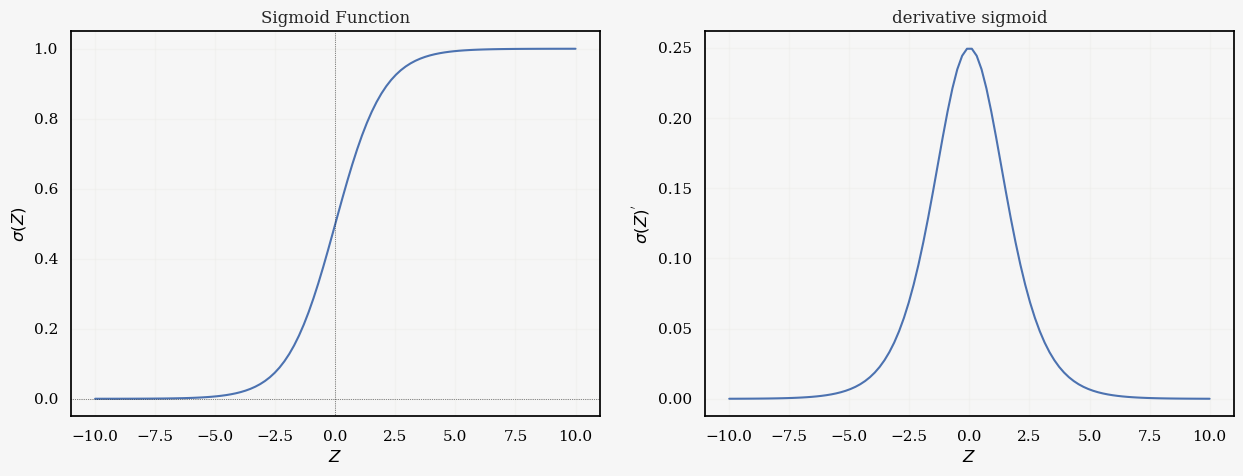

In [9]:
Z = np.linspace(-10,10,100) # 임의의 선형 결합 값 Z 생성

fig,ax = plt.subplots(figsize = (15,5), ncols = 2)

ax[0].plot(Z , sigmoid(Z))
ax[0].set_title('Sigmoid Function')
ax[0].axvline(0, lw = 0.5, ls = ':' ,c = 'k')
ax[0].axhline(0, lw = 0.5, ls = ':', c = 'k')
ax[0].set_xlabel('$Z$')
ax[0].set_ylabel('$\sigma(Z)$')

ax[1].plot(Z , derivative_sigmoid(Z))
ax[1].set_title('derivative sigmoid')
ax[1].set_xlabel('$Z$')
ax[1].set_ylabel("$\sigma(Z)^{'}$")

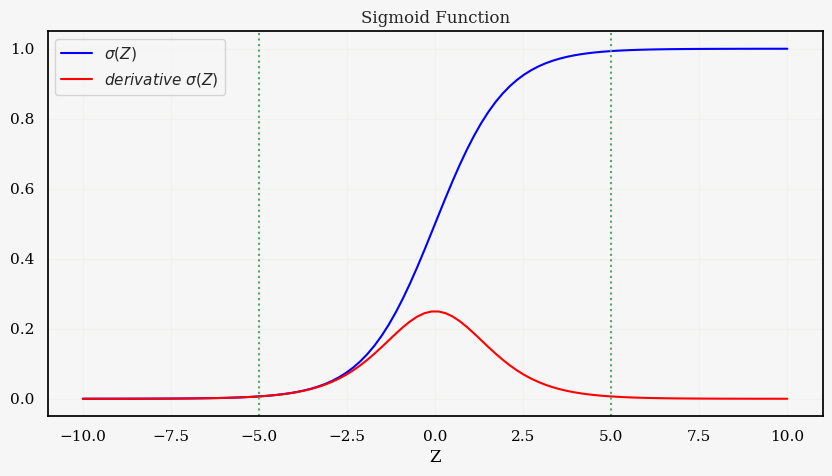

In [10]:
fig,ax = plt.subplots(figsize = (10,5))

ax.plot(Z, sigmoid(Z), c = 'blue', label = '$\sigma(Z)$')
ax.plot(Z,derivative_sigmoid(Z), c =  'red', label = '$derivative \ \sigma(Z)$')
ax.set_xlabel('Z')
ax.set_title('Sigmoid Function')

ax.axvline(-5, ls = ':', c = 'g')
ax.axvline(5, ls = ':', c = 'g')

ax.legend()

시그모이드 함수의 기울기 값을 보면 Z의 절대값이 5 이상인 경우부터는 기울기가 매우 작아짐을 볼 수 있다. 

# **2. Tanh(X)**

$Tanh(Z) : \frac{e^{z} - e^{-z}}{e^z + e^{-z}}$

$\frac{d}{dz} Tanh(Z) : 1 - Tanh(Z) ^ 2$

탄젠트 함수또한 시그모이드 함수와 유사하지만 특정 상황에서 유리하게 만드는 몇 가지 차이점이 존재한다.

범위 : 함수는 입력을 -1과 1 사이의 범위에 맵핑하여 평균이 0이 되도록 만든다. 이러한 특징은 히든 레이어에서의 아웃풋 값들이 평균이 0이 되도록 만들어, 그래디언트 소실 문제를 완화하는데 도움이 된다. 

S자형 곡선 : 어느지점에서나 매끄럽고 미분 가능하다. 이는 역전파와 같은 기울기 기반 최적화 기술에 중요하다.

탄젠트 함수는 이러한 특징으로 인해 대부분의 상황에서 시그모이드 함수보다 성능이 뛰어나다. 

하지만, 탄젠트 함수도 시그모이드 함수와 같이 기울기 소실 문제 혹은 학습 속도의 저하 등의 문제가 발생할 수 있다.

In [11]:
def tanh(z):
    return (np.exp(z) - np.exp(-z))/ (np.exp(z) + np.exp(-z))

def derivative_tanh(z):
    return 1 - tanh(z)**2

Text(0, 0.5, "$\\sigma(Z)^{'}$")

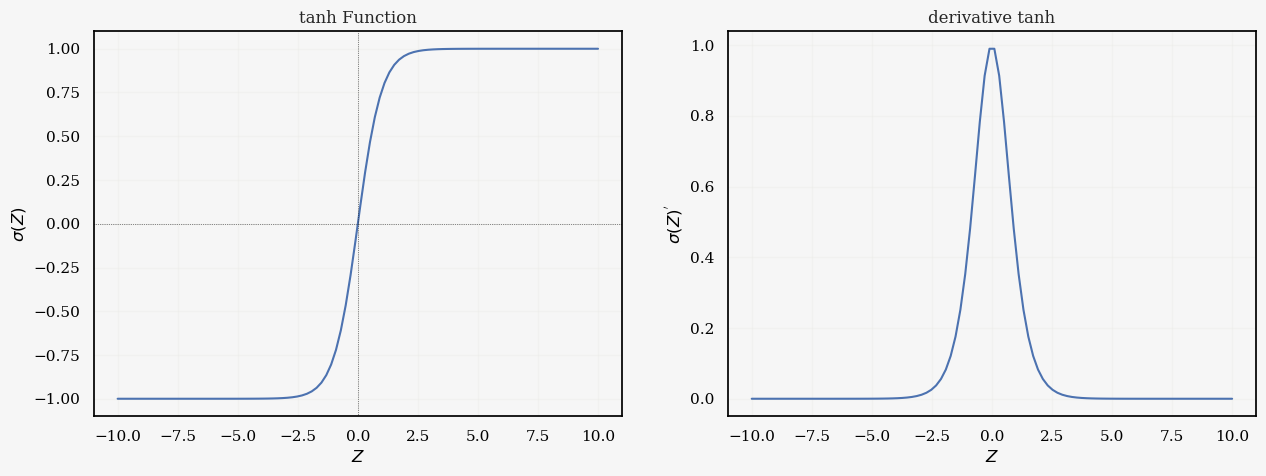

In [12]:
fig,ax = plt.subplots(figsize = (15,5), ncols = 2)

ax[0].plot(Z , tanh(Z))
ax[0].set_title('tanh Function')
ax[0].axvline(0, lw = 0.5, ls = ':' ,c = 'k')
ax[0].axhline(0, lw = 0.5, ls = ':', c = 'k')

ax[0].set_xlabel('$Z$')
ax[0].set_ylabel('$\sigma(Z)$')

ax[1].plot(Z , derivative_tanh(Z))
ax[1].set_title('derivative tanh')
ax[1].set_xlabel('$Z$')
ax[1].set_ylabel("$\sigma(Z)^{'}$")

# **기울기 소실 문제란**

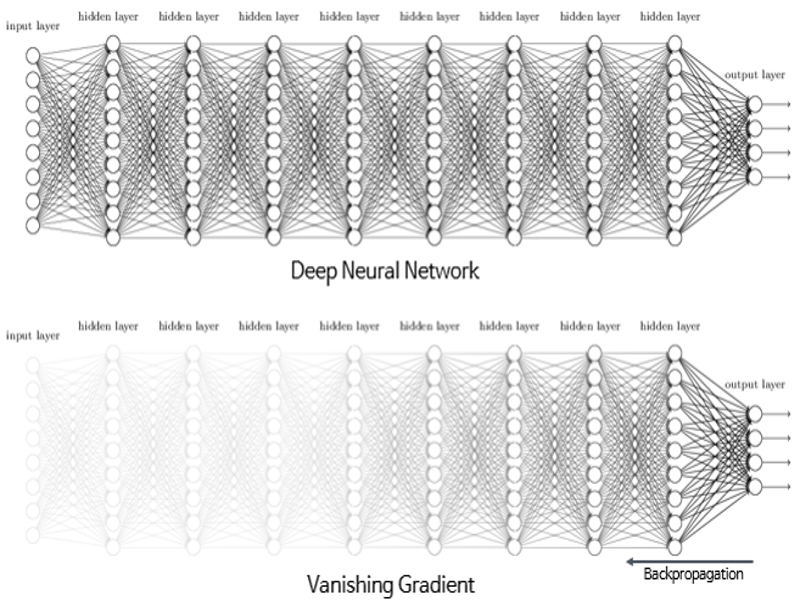

In [13]:
image = Image.open("C:/Users/whileduck/Desktop/gradient vanishing.png")
image.resize((800,600))

Gradient vanishing 이란 신경망의 층이 깊어졌을 때, 역전파 과정에서 이 전 역전파 과정에서 곱해지는 손실 함수의 기울기가 0에 가까울 정도로 작아져 

역전파 도중 업데이트가 이뤄지지 않는 경우를 의미한다. 

만약 출력층에 가까운 레이어를 i 번째 레이어라고 한다면

i 번째 레이어에서의 손실함수의 기울기가 0에 가까울 수록, i-1번째 레이어에 곱해지는 기울기는 더욱 더 0에 가까워질 것이고, 점점점 입력층에 가깝게 역전파가 진행된다면

입력층에서 곱해지는 손실함수의 기울기는 거의 0에 수렴할 것이다.

이러한 문제는 학습 속도의 저하 혹은 학습이 이뤄지지 않는 현상을 초래할 수 있다. 

### **그럼 왜 Tanh function 은 sigmoid function에 비해 Gradient vanishing 문제에서 조금 더 나은 상황을 보일까?**

Text(0.5, 0.98, 'Sigmoid vs Tanh')

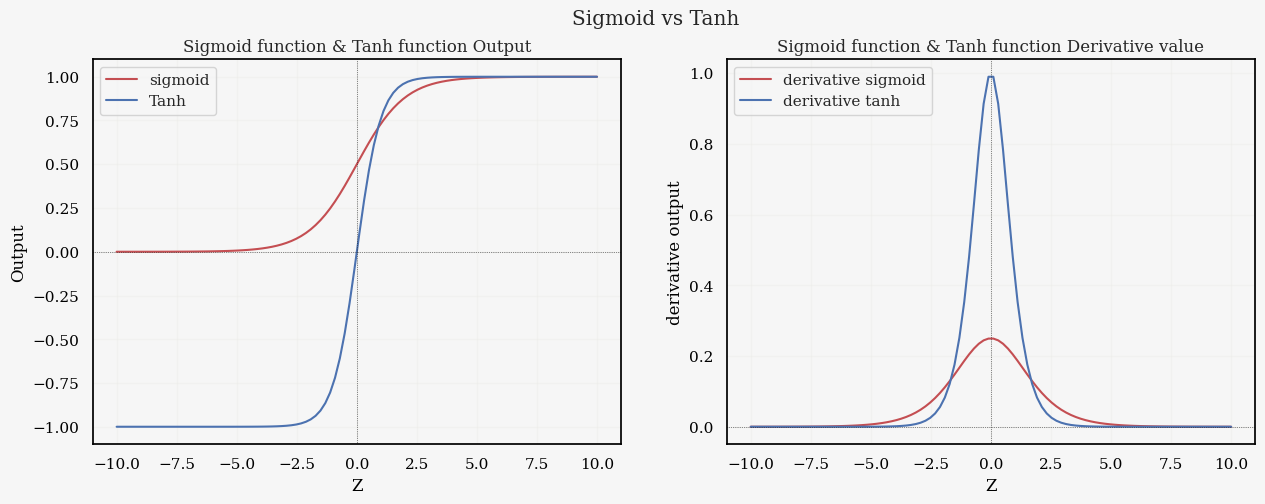

In [14]:
fig,ax = plt.subplots(ncols = 2, figsize = (15,5))

ax[0].plot(Z,sigmoid(Z), c = 'r', label = 'sigmoid')
ax[0].plot(Z,tanh(Z), c = 'b', label = 'Tanh')
ax[0].axvline(0, lw = 0.5, ls = ':' ,c = 'k')
ax[0].axhline(0, lw = 0.5, ls = ':', c = 'k')
ax[0].legend()
ax[0].set_title('Sigmoid function & Tanh function Output')
ax[0].set_xlabel('Z')
ax[0].set_ylabel('Output')


ax[1].plot(Z,derivative_sigmoid(Z), c = 'r', label= 'derivative sigmoid')
ax[1].plot(Z,derivative_tanh(Z), c = 'b', label= 'derivative tanh')
ax[1].axvline(0, lw = 0.5, ls = ':' ,c = 'k')
ax[1].axhline(0, lw = 0.5, ls = ':', c = 'k')
ax[1].legend(loc = 'upper left')
ax[1].set_title('Sigmoid function & Tanh function Derivative value')
ax[1].set_xlabel('Z')
ax[1].set_ylabel('derivative output')

fig.suptitle('Sigmoid vs Tanh')

sigmoid function 의 output 값의 평균은 0.5 , tanh function의 output 값의 평균은 0인것을 볼 수 있다. 

즉 , front propagation 시에는 각 레이어의 아웃풋 값의 평균이 sigmoid function 일 때는 0.5 , tanh function 일 때는 0 이라는 것을 알 수 있다.

back propagation 할 때는 어떨까 ? sigmoid function 의 back propagation 의 평균 값은 약 0.2 , tanh function 일 때는 약 1인 것을 알 수 있다.

sigmoid function 의 back propagation 의 평균 output 값은, 즉 i-1 번째 layer 의 인풋값이 되는 것이기 때문에 

i-1 번째 레이어부터의 기울기 값이 점진적으로 곱해지면서  0에 가까워질도록 작아질 것이다. 

하지만 tanh function 의 back propagation 의 평균 output 값이자 input 값은 약 1에 가깝기 때문에 

gradient vanishing 문제에서 비교적 sigmoid 함수에 비해서는 느리게 작아지는 모습을 볼 수 있다.

# **Gradient Vanishing 문제 확인하기**

In [15]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def tanh(Z):
    return np.tanh(Z)

def sigmoid_derivates(Z):
    return sigmoid(Z) * (1- sigmoid(Z))

def tanh_derivates(Z):
    return 1 - tanh(Z) ** 2

def gradient_descent(Z,W, activation,learning_rate = 0.1):
    
    if activation == 'sigmoid':
        dw = sigmoid_derivates(Z)
    else:
        dw = tanh_derivates(Z)
        
    new_w = W - dw * learning_rate
    
    return new_w,dw

Text(0.5, 0.98, 'Sigmoid vs Tanh ')

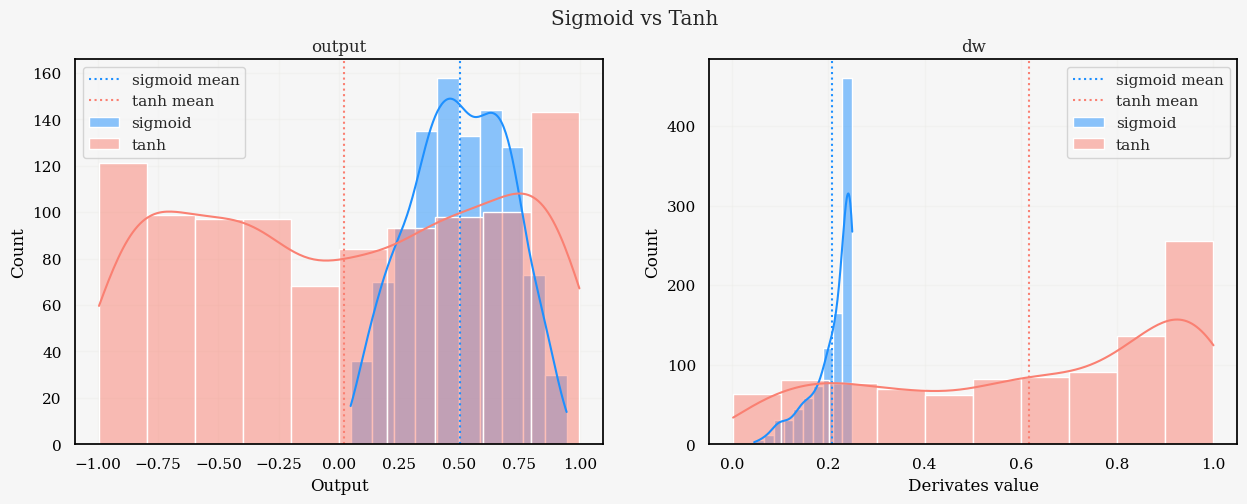

In [16]:
fig,ax = plt.subplots(ncols = 2 ,figsize = (15,5))

color = ['dodgerblue', 'salmon']
for idx ,activation in enumerate(['sigmoid', 'tanh']):
    
    # 임의의 선형 결합값 생성
    
    c = color[idx]
    
    random_z = np.random.normal(0,1,size = 1000)
    if idx == 0: # sigmoid 함수면
        output = sigmoid(random_z)
        dw = sigmoid_derivates(random_z)
    else:
        output = tanh(random_z)
        dw = tanh_derivates(random_z)
        
    sns.histplot(output, ax = ax[0], kde = True, label = activation, alpha = 0.5, bins = 10, color = c)
    sns.histplot(dw,  ax = ax[1], kde = True, label = activation, alpha = 0.5, bins = 10, color = c)
    
    ax[0].axvline(np.mean(output), ls = ':', label = f'{activation} mean', c = c)
    ax[1].axvline(np.mean(dw), ls = ':', label = f'{activation} mean', c = c)
    

ax[0].legend()
ax[0].set_title('output')
ax[0].set_xlabel('Output')

ax[1].legend()
ax[1].set_title('dw')
ax[1].set_xlabel('Derivates value')

fig.suptitle('Sigmoid vs Tanh ')

랜덤한 선형 결합값 Z 를 10000개를 생성한 후 

activation function 이 sigmoid 함수일 때와 tanh function 일 때를 비교해보았다. 

output 값의 평균값은 sigmoid 함수 값이 더욱 크지만 , 비교적 output 값의 분산이 tanh function 이 더욱 큰 것을 알 수 있다. 

back propagation 에서 중요한 미분값을 살펴보게 되면 sigmoid function 의 미분값은 0 ~ 0.2 사이에서 값을 갖지만 tanh fucntion 의 경우는 0부터 1 사이의 값에서 

미분값을 갖는 것을 볼 수 있다. 

작은 분산, 평균적으로 작은 미분값을 가지는 sigmoid function 은 tanh function 의 경우 back propagation 과정에서 더 빠르게 값이 작아질 수 밖에 없다.

하지만 위에서 보면 알 수 있듯이 tanh function 또한 미분 값이 소수점 값을 갖는 경우가 있기 때문에 

gradient vanishing 문제에서 비교적 자유로울 수는 없다.

Text(0.5, 0.98, 'X = 1 ,W = 2 , Target = -2')

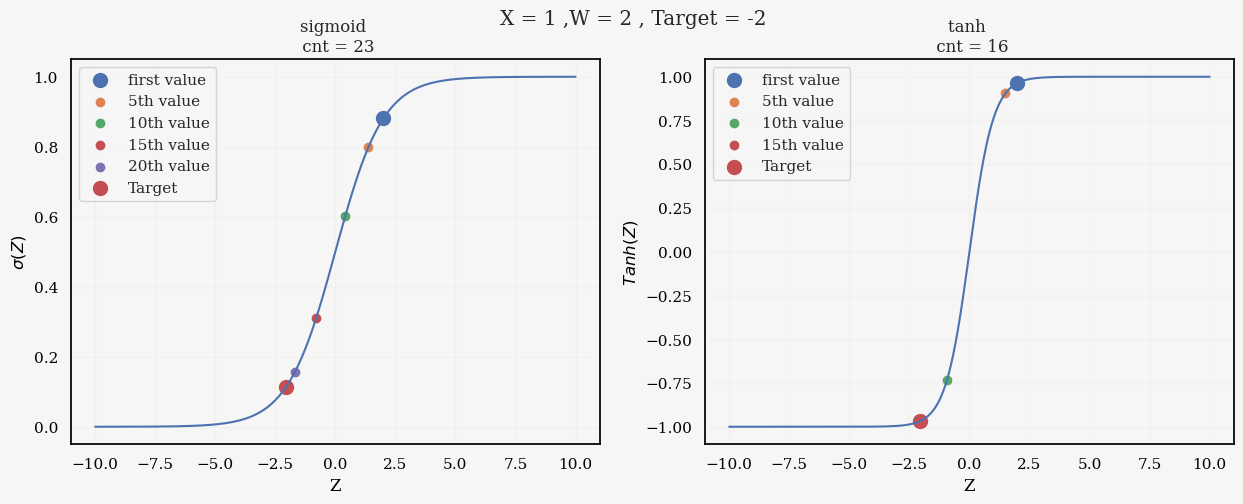

In [17]:
fig,ax = plt.subplots(ncols = 2 ,figsize = (15,5))
Z = np.linspace(-10,10,1000)
ax[0].plot(Z, sigmoid(Z))

ax[0].set_xlabel('Z')
ax[0].set_ylabel('$\sigma(Z)$')
ax[0].set_title('Sigmoid')


ax[1].plot(Z,tanh(Z))
ax[1].set_title('Tanh')
ax[1].set_xlabel('Z')
ax[1].set_ylabel('$Tanh(Z)$')

# sigmoid gradient descent

for idx ,activation in enumerate(['sigmoid', 'tanh']):
    
    # 초기 임의의 X,W 설정
    X = 1 
    W = 2
    
    Z = X * W
    cnt = 0 # 경사 하강 횟수
    
    if idx == 0:
        ax[idx].scatter(Z, sigmoid(Z), label = f'first value', s = 100)
    else:
        ax[idx].scatter(Z, tanh(Z), label = f'first value', s = 100) 

    
    
    while Z >= -2 :
        
        W,_ = gradient_descent(Z,W, activation,learning_rate = 1)
        Z = X * W
        cnt += 1
        if cnt % 5 == 0:
            if idx == 0:
                ax[idx].scatter(Z, sigmoid(Z), label = f'{cnt}th value')
            else:
                ax[idx].scatter(Z, tanh(Z), label = f'{cnt}th value') 
                
        if cnt == 10000:
            break 
        
    if idx == 0:
        ax[idx].scatter(Z,sigmoid(Z), label = 'Target', s = 100, c = 'r')
    else:
        ax[idx].scatter(Z,tanh(Z), label = 'Target', s = 100, c = 'r')
        
    ax[idx].legend()
    ax[idx].set_title(f'{activation} \n cnt = {cnt}')
    
fig.suptitle('X = 1 ,W = 2 , Target = -2')

물론 임의로 정해지는 첫 output 값인 Z 가 미분 계수가 0이 되지 않는 부분,  즉 너무 크지도 작지도 않은 값에 존재하고 

Target 지점이 너무 크지도 , 작지도 않은 지점이라면 sigmoid , tanh function 모두 빠르게 수렴하는 것을 볼 수 있다.

tanh function 의 기울기가 더 가파르기 때문에 더욱 빠르게 목표 지점까지 하강하는 모습을 볼 수 있다.

하지만 첫 Z 값이 너무 크거나, 목표지점까지의 미분 계수가 0이 되는 지점을 지나게 된다면 두 활성화 함수 모두 학습을 마치지 못하고 

Gradient vanishing 문제를 맞닥뜨리게 된다.

Text(0.5, 0.98, 'X = 1 ,W = 10 , Target = -2')

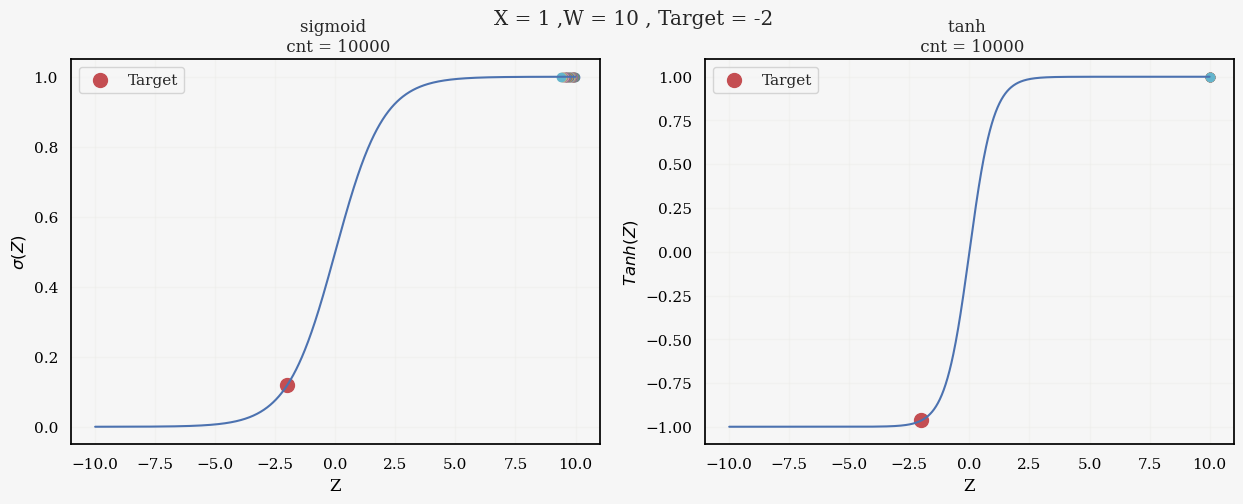

In [18]:
fig,ax = plt.subplots(ncols = 2 ,figsize = (15,5))
Z = np.linspace(-10,10,1000)
ax[0].plot(Z, sigmoid(Z))

ax[0].set_xlabel('Z')
ax[0].set_ylabel('$\sigma(Z)$')
ax[0].set_title('Sigmoid')


ax[1].plot(Z,tanh(Z))
ax[1].set_title('Tanh')
ax[1].set_xlabel('Z')
ax[1].set_ylabel('$Tanh(Z)$')

# sigmoid gradient descent

for idx ,activation in enumerate(['sigmoid', 'tanh']):
    
    # 초기 임의의 X,W 설정
    X = 1 
    W = 10
    
    Z = X * W
    cnt = 0 # 경사 하강 횟수
    
    while Z >= -2 :
        W,_ = gradient_descent(Z,W, activation,learning_rate = 1)
        Z = X * W
        cnt += 1
        if cnt % 500 == 0:
            if idx == 0:
                ax[idx].scatter(Z, sigmoid(Z))
            else:
                ax[idx].scatter(Z, tanh(Z)) 
                
        if cnt == 10000:
            break 
        
    if idx == 0:
        ax[idx].scatter(-2,sigmoid(-2), label = 'Target', c = 'r', s = 100)
    else:
        ax[idx].scatter(-2,tanh(-2), label = 'Target', c = 'r', s = 100)
        
    ax[idx].set_title(f'{activation} \n cnt = {cnt}')
    ax[idx].legend()
fig.suptitle('X = 1 ,W = 10 , Target = -2')

# **Relu**

이를 해결하기 나온 것이 Relu 함수로서 , Relu 함수는 양수 값에 대해서는 해당 값을 return 시키고 

음수 값에 대해서는 0의 값을 return 시킨다.

이러한 특징은 양수값에 대해서는 미분값이 항상 1이기 때문에, Gradient Descent 할 때 vanishing 문제가 발생하지 않는다 .

각 neuron 의 도함수 값이 1 이하로 떨어지지 않기 때문이다.

Text(0.5, 0.98, 'Relu function')

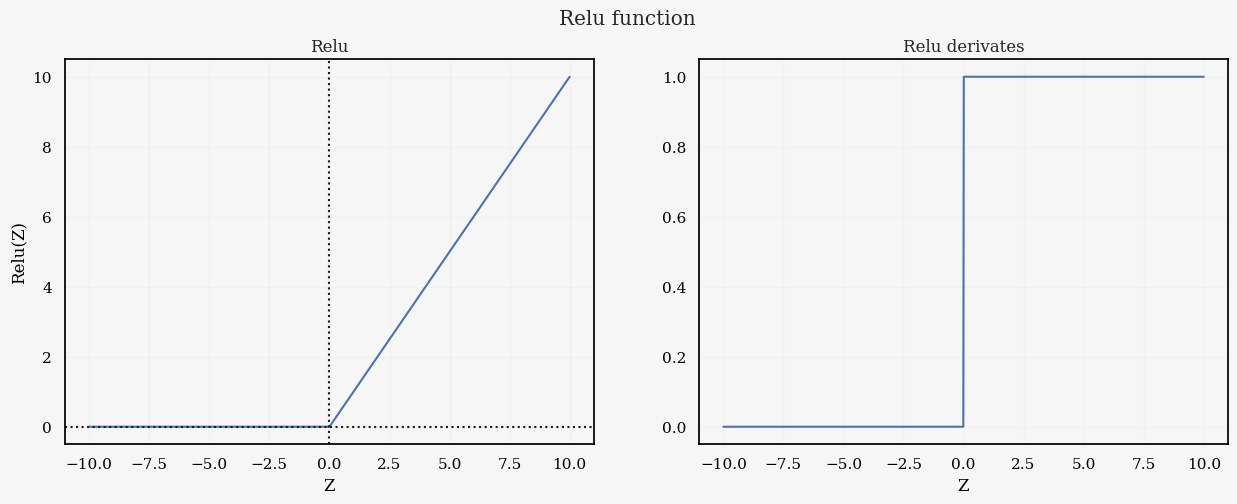

In [19]:
def relu(Z):
    
    return np.maximum(0,Z)

def relu_derivates(Z):
    
    return np.where(Z > 0 ,1, 0)

Z = np.linspace(-10,10,1000)

fig,ax = plt.subplots(ncols = 2, figsize = (15,5))

ax[0].plot(Z,relu(Z))
ax[0].axvline(0,ls = ':', c ='k')
ax[0].axhline(0,ls = ':', c ='k')
ax[0].set_xlabel('Z')
ax[0].set_ylabel('Relu(Z)')
ax[0].set_title('Relu')

ax[1].plot(Z,relu_derivates(Z))
ax[1].set_title('Relu derivates')
ax[1].set_xlabel('Z')


fig.suptitle('Relu function')

relu 함수는 하지만 Z 값이 0일때는 불연속적이라는 특징을 갖는데 실제 선형결합해서 만들어지는 Z 값이 0일 확률은 매우 작기 때문에 Z값이 0이 되어 미분이 되지 않으면 어떡하지 ? 

라는 걱정에서 멀어질 수 있다.

이러한 특징으로 활성화 함수를 어떤 것을 선택해야 할지 선택하지 못할 때 대부분 Relu 함수를 사용하면 

sigmoid 함수나 tanh 함수에 비해서 훨씬 빠른 하강 속도와, vanishing 문제에서 자유로울 수 있다.

하지만 이러한 relu 함수 마저도 문제가 발생하는데 그것은 선형 결합하여 만들어지는 Z값이 만약 음수일 경우에 

도함수 값이 0이 되어 더이상의 업데이트가 일어나지 않는 'Dying Relu' 문제가 발생하곤 한다. 

이렇게 죽어가는 relu 문제를 해결하기 위해서 나온 것이 leaky relu 이다.

# **Leaky relu**

Text(0.5, 0.98, 'LeakyRelu function, alpha = 0.1')

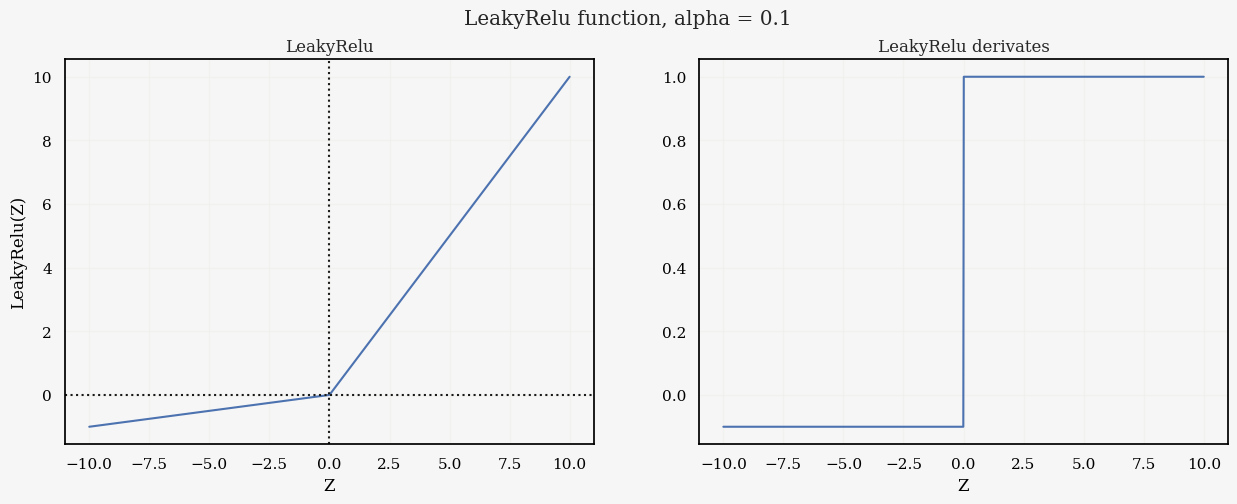

In [20]:
def leakyrelu(Z, a = 0.1):
    
    return np.maximum(a*Z,Z)

def leakyrelu_derivates(Z, a = 0.1):
    
    return np.where(Z > 0 ,1, -a)

Z = np.linspace(-10,10,1000)

fig,ax = plt.subplots(ncols = 2, figsize = (15,5))

ax[0].plot(Z,leakyrelu(Z))
ax[0].axvline(0,ls = ':', c ='k')
ax[0].axhline(0,ls = ':', c ='k')
ax[0].set_xlabel('Z')
ax[0].set_ylabel('LeakyRelu(Z)')
ax[0].set_title('LeakyRelu')

ax[1].plot(Z,leakyrelu_derivates(Z))
ax[1].set_title('LeakyRelu derivates')
ax[1].set_xlabel('Z')

fig.suptitle('LeakyRelu function, alpha = 0.1')

Leaky relu 는 선형결합하여 생성되는 Z값이 음수일 경우에는 매우 작은 값인 $\alpha$ 를 곱해줘 

Z값이 음수인 경우에는 도함수 값이 $\alpha$ 가 되도록만들어줘 Z값이 음수일지라도 학습이 계속 이뤄지도록 만들어준다. 

(하지만 $\alpha$ 값이 작기 때문에 Gradient vanishin 문제에서 자유롭진 못하다.)


# **텐서플로우를 이용하여 DNN 만든 후 학습속도 비교**

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.datasets import make_classification,make_moons

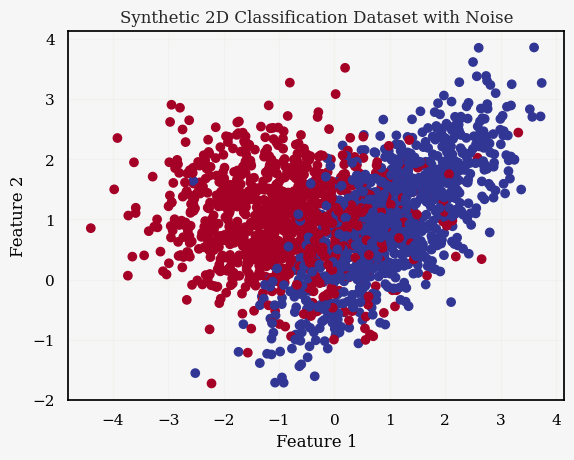

In [22]:
n_samples = 2000
n_features = 2

# Generate the dataset without noise
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

noise_stddev = 0.5
X_with_noise = X + np.random.normal(scale=noise_stddev, size=X.shape)

# Plot the synthetic dataset with noise
plt.scatter(X_with_noise[:, 0], X_with_noise[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Classification Dataset with Noise')
plt.show()

In [26]:
def custom_weight_initializer(shape, dtype=None):
    initial_weights = np.random.randn(*shape) 
    return tf.constant(initial_weights, dtype=dtype)

def create_model(INPUT_SHAPE, LAYERS, UNITS, ACTIVATION):
    inputs = layers.Input(shape=INPUT_SHAPE)
    
    layer_kwargs = {
        'units': UNITS,
        'activation': ACTIVATION,
        'kernel_initializer': custom_weight_initializer  
    }
    
    x = layers.Dense(**layer_kwargs)(inputs)

    for _ in range(LAYERS):
        np.random.seed(42 + _) # layer 마다 랜덤 시드가 다르게 
        
        x = layers.Dense(**layer_kwargs)(x)

    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)
    
    return model

Text(0, 0.5, 'Loss')

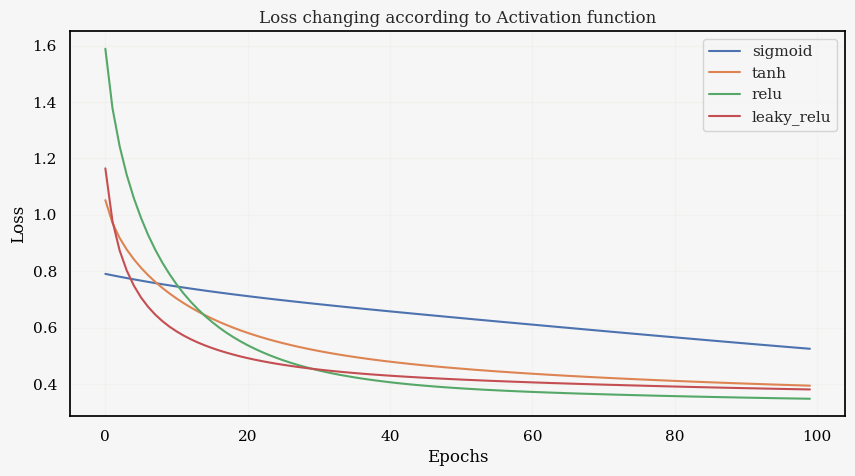

In [27]:
params = {'INPUT_SHAPE': X_with_noise.shape[1:], 'LAYERS':1, 'UNITS':10}
activations = ['sigmoid','tanh','relu','leaky_relu']
optimizers = {'loss':'binary_crossentropy',
            'optimizer':tf.optimizers.legacy.Adam(learning_rate = 0.00005),
            'metrics':'accuracy'}   

fig,ax = plt.subplots(figsize = (10, 5))

for activation in activations:
    
    params['ACTIVATION'] = activation
    
    model = create_model(**params)
    model.compile(**optimizers) # learning_rate 설정
    
    history = model.fit(X_with_noise,y, epochs = 100, verbose = 0)
    
    ax.plot(history.history['loss'], label = activation)
    
ax.legend()
ax.set_title('Loss changing according to Activation function')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

같은 데이터셋에 대해서 Loss function 의 최소값까지 하강하는 속도는 sigmoid function 이 가장 낮았으며 

특정 epochs 이후부터는 sigmoid function과 tanh function 의 DNN 은 학습이 일어나지 않는 모습을 볼 수 있다. 

leaky relu function 이 가장 빠르게 최적의 loss 값에 도달했으며 , relu function 도 vanishing 문제 없이 하강하는 모습을 볼 수 있다.

# **sigmoid fucntion이더라도 hidden unit의 수가 더 많다면 학습 속도가 더 빠르거나 gradient vanising 문제를 줄일 수 있을까 ?**

In [34]:
def custom_weight_initializer(shape, dtype=None):
    initial_weights = np.random.randn(*shape) 
    return tf.constant(initial_weights, dtype=dtype)

def create_model(INPUT_SHAPE, LAYERS, UNITS, ACTIVATION):
    inputs = layers.Input(shape=INPUT_SHAPE)
    
    layer_kwargs = {
        'units': UNITS,
        'activation': ACTIVATION,
        'kernel_initializer': custom_weight_initializer  
    }
        
    
    
    x = layers.Dense(**layer_kwargs)(inputs)
    x = layers.Dense(units = 5, activation = 'sigmoid', kernel_initializer = custom_weight_initializer)(x)
    for _ in range(LAYERS):
        np.random.seed(42 + _) # layer 마다 랜덤 시드가 다르게 
        
        x = layers.Dense(**layer_kwargs)(x)

    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)
    
    return model

Text(0, 0.5, 'Loss')

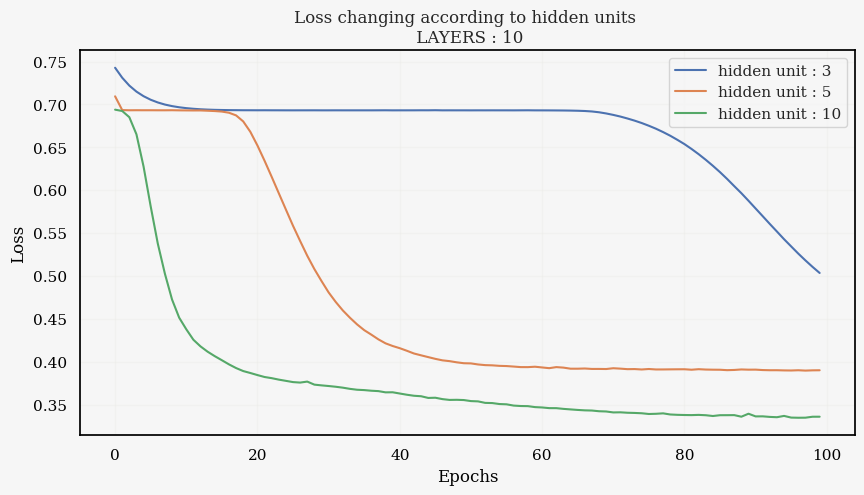

In [35]:
params = {'INPUT_SHAPE': X.shape[1:], 'LAYERS':10, 'ACTIVATION':'sigmoid'}
units = [3, 5, 10]
optimizers = {'loss':'binary_crossentropy',
            'optimizer':tf.optimizers.legacy.Adam(learning_rate = 0.0005),
            'metrics':'accuracy'}   

fig,ax = plt.subplots(figsize = (10, 5))

for unit in units:
    
    params['UNITS'] = unit
    
    model = create_model(**params)
    model.compile(**optimizers) # learning_rate 설정
    
    history = model.fit(X_with_noise,y, epochs = 100, verbose = 0)
    
    ax.plot(history.history['loss'], label = f'hidden unit : {unit}')
    
ax.legend()
ax.set_title(f'Loss changing according to hidden units \n LAYERS : {10}')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')